In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../datasets/PH_houses_v2.csv")

df.head()

,Description,Location,Price (PHP),Bedrooms,Bath,Floor_area (sqm),Land_area (sqm),Latitude,Longitude,Link
0,2-Bedroom Unit for Sale in Amisa Private Resid...,"Mactan, Lapu-Lapu","15,916,180",2,2,74,na,10.3051555,124.011241,https://www.lamudi.com.ph/2-bedroom-unit-for-s...
1,1-Bedroom Unit for Sale in Amisa Private Resid...,"Mactan, Lapu-Lapu","8,730,355",1,1,41,na,10.3051555,124.011241,https://www.lamudi.com.ph/1-bedroom-unit-for-s...
2,Offices at The Galleon - Prime Unit (11G) for ...,"San Antonio, Pasig","27,448,000",na,na,82,na,14.588716,121.060009,https://www.lamudi.com.ph/offices-at-the-galle...
3,1-Bedroom Unit (821) for Sale in Maple at Verd...,"Ugong, Pasig","16,011,000",1,na,58,na,14.588882,121.079016,https://www.lamudi.com.ph/1-bedroom-unit-821-f...
4,Alice 2 Storey Townhouse For Sale in Lancaster...,"Tapia, General Trias","1,935,600",3,na,40,40,14.35507,120.876425,https://www.lamudi.com.ph/alice-2-storey-townh...


In [3]:
# Display info to if data types are properly converted
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Description       1500 non-null   object 
 1   Location          1500 non-null   object 
 2   Price (PHP)       1500 non-null   object 
 3   Bedrooms          1500 non-null   object 
 4   Bath              1500 non-null   object 
 5   Floor_area (sqm)  1500 non-null   object 
 6   Land_area (sqm)   1500 non-null   object 
 7   Latitude          1500 non-null   object 
 8   Longitude         1500 non-null   float64
 9   Link              1500 non-null   object 
dtypes: float64(1), object(9)
memory usage: 117.3+ KB


In [4]:
# Convert relevant columns to float
df['Price (PHP)'] = pd.to_numeric(df['Price (PHP)'].str.replace(',', ''), errors='coerce')
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')
df['Floor_area (sqm)'] = pd.to_numeric(df['Floor_area (sqm)'], errors='coerce')
df['Land_area (sqm)'] = pd.to_numeric(df['Land_area (sqm)'], errors='coerce')
df['Bedrooms'] = pd.to_numeric(df['Bedrooms'], errors='coerce')
df['Bath'] = pd.to_numeric(df['Bath'], errors='coerce')

# Display the updated DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Description       1500 non-null   object 
 1   Location          1500 non-null   object 
 2   Price (PHP)       1460 non-null   float64
 3   Bedrooms          1380 non-null   float64
 4   Bath              867 non-null    float64
 5   Floor_area (sqm)  1442 non-null   float64
 6   Land_area (sqm)   329 non-null    float64
 7   Latitude          1479 non-null   float64
 8   Longitude         1500 non-null   float64
 9   Link              1500 non-null   object 
dtypes: float64(7), object(3)
memory usage: 117.3+ KB


In [5]:
# Perform feature engineering

# Extract the city from the Location column
df["City"] = df["Location"].str.split(", ").str[1]

# Fill "Bath" NaN values with 1
df["Bath"] = df["Bath"].fillna(1)

# Fill "Land_area (sqm)" NaN with "Floor_area (sqm)"
df["Land_area (sqm)"] = df["Land_area (sqm)"].fillna(df["Floor_area (sqm)"])

In [6]:
# Remove scientific notation and limit decimal places to 2
df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,Price (PHP),Bedrooms,Bath,Floor_area (sqm),Land_area (sqm),Latitude,Longitude
count,1460.00,1380.00,1500.00,1442.00,1476.00,1479.00,1500.00
mean,14595543.03,1.76,1.19,70.52,864.69,14.14,121.30
std,13060869.31,0.98,0.48,52.15,27344.50,1.59,0.96
min,850000.00,1.00,1.00,16.00,16.00,7.09,120.55
25%,5962000.00,1.00,1.00,43.00,45.00,14.43,121.04
50%,11088000.00,1.00,1.00,58.00,59.50,14.58,121.06
75%,17743600.00,2.00,1.00,84.00,92.00,14.59,121.08
max,175265000.00,5.00,6.00,1136.00,1050174.00,16.42,125.65


In [7]:
# Filter the necessary columns to get the filtered dataset for training

filtered_df = df[
    ~df["Price (PHP)"].isnull()
    & ~df["Bedrooms"].isnull()
    & ~df["Floor_area (sqm)"].isnull()
    & ~df["Land_area (sqm)"].isnull()
    & ~df["Latitude"].isnull()
    & ~df["City"].isnull()
]

# Show filtered DataFrame
filtered_df.head()

,Description,Location,Price (PHP),Bedrooms,Bath,Floor_area (sqm),Land_area (sqm),Latitude,Longitude,Link,City
0,2-Bedroom Unit for Sale in Amisa Private Resid...,"Mactan, Lapu-Lapu",15916180.0,2.0,2.0,74.0,74.0,10.305155,124.011241,https://www.lamudi.com.ph/2-bedroom-unit-for-s...,Lapu-Lapu
1,1-Bedroom Unit for Sale in Amisa Private Resid...,"Mactan, Lapu-Lapu",8730355.0,1.0,1.0,41.0,41.0,10.305155,124.011241,https://www.lamudi.com.ph/1-bedroom-unit-for-s...,Lapu-Lapu
3,1-Bedroom Unit (821) for Sale in Maple at Verd...,"Ugong, Pasig",16011000.0,1.0,1.0,58.0,58.0,14.588882,121.079016,https://www.lamudi.com.ph/1-bedroom-unit-821-f...,Pasig
4,Alice 2 Storey Townhouse For Sale in Lancaster...,"Tapia, General Trias",1935600.0,3.0,1.0,40.0,40.0,14.355070,120.876425,https://www.lamudi.com.ph/alice-2-storey-townh...,General Trias
5,"Studio Condo Unit (6B) for Sale in One Sierra,...","Highway Hills, Mandaluyong",7587013.0,1.0,1.0,32.0,32.0,14.578255,121.052143,https://www.lamudi.com.ph/studio-condo-unit-6b...,Mandaluyong


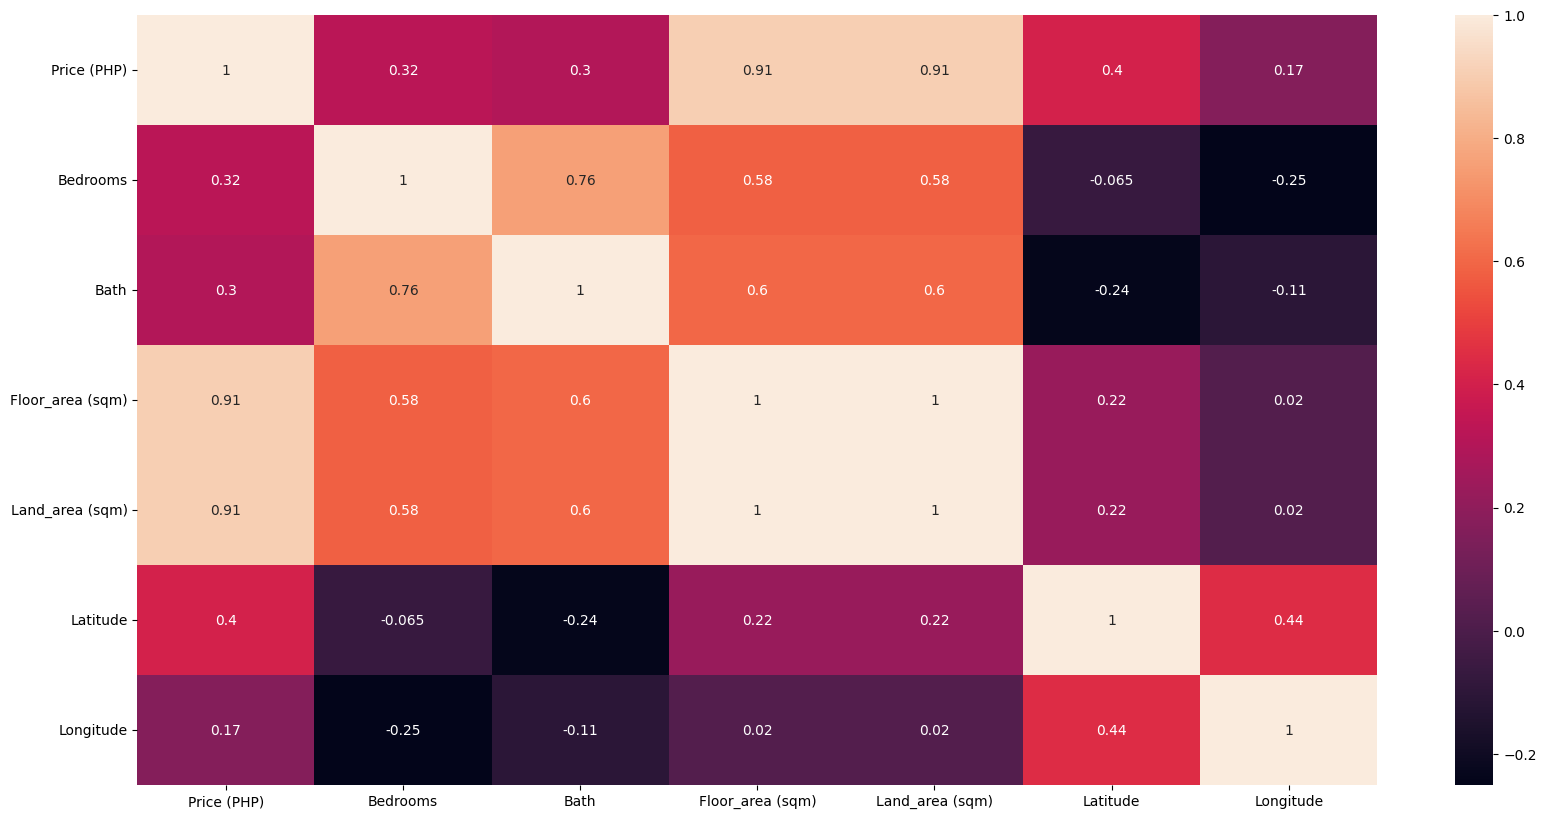

In [ ]:
corr_df = filtered_df[filtered_df["City"].str.contains("Mandaluyong")].select_dtypes(include=['float64', 'int64'])

sns.heatmap(corr_df.corr(), annot=True)

plt.rcParams['figure.figsize'] = (20,5)

plt.show()

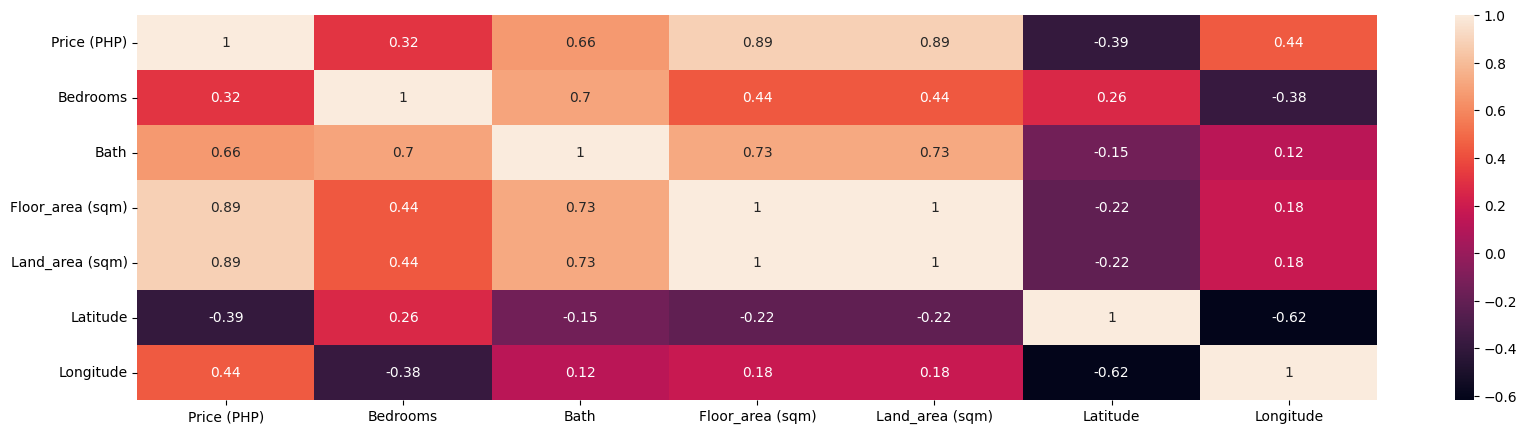

In [39]:
sns.heatmap(filtered_df[filtered_df["City"].str.contains("Quezon City")].select_dtypes(include=['float64', 'int64']).corr(), annot=True)

plt.show()

In [38]:
filtered_df.groupby("City").size().sort_values(ascending=False)

City
Pasig                 608
Mandaluyong            95
Quezon City            90
Davao                  41
Muntinlupa             41
Cebu                   39
Calamba                29
Dasmarinas             28
Baguio                 26
General Trias          26
Silang                 19
Manila                 18
Imus                   17
Lipa                   16
Pasay                  16
Malolos                15
Binan                  15
Taal                   13
Porac                  13
Las Pinas              12
San Juan               11
Kawit                  10
Balanga                10
Tayabas                10
San Jose del Monte      9
Paranaque               9
Santa Maria             8
Ozamiz                  8
Valenzuela              6
Lapu-Lapu               5
Cainta                  5
Cabanatuan              5
Tanza                   5
Mexico                  4
Bacolod                 4
Compostela              3
Tanauan                 3
Mandaue                 2
Santo T